In [1]:
import numpy as np
import pandas as pd

In [2]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

D:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
from sklearn.datasets import load_boston

In [12]:
df=load_boston()

In [13]:
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [15]:
dataset=pd.DataFrame(df.data)

In [16]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [17]:
dataset.columns=df.feature_names

In [18]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
X=dataset
y=df.target

In [20]:
y


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [22]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [24]:
X_train=scaler.fit_transform(X_train)

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [25]:
X_test=scaler.fit_transform(X_test)

In [26]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.10,0.0,0.740,6.406,97.2,2.0651,24.0,666.0,20.2,385.96,19.52
23,0.98843,0.0,8.14,0.0,0.538,5.813,100.0,4.0952,4.0,307.0,21.0,394.54,19.88
225,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63
433,5.58107,0.0,18.10,0.0,0.713,6.436,87.9,2.3158,24.0,666.0,20.2,100.19,16.22


In [35]:
regression= LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [28]:
from sklearn.model_selection import cross_val_score

In [32]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [34]:
np.mean(mse)

-25.977777430926334

In [36]:
reg_pred=regression.predict(X_test)

In [37]:
reg_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

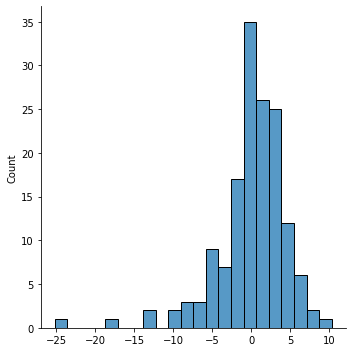

In [38]:
import seaborn as sns
sns.displot(reg_pred-y_test)

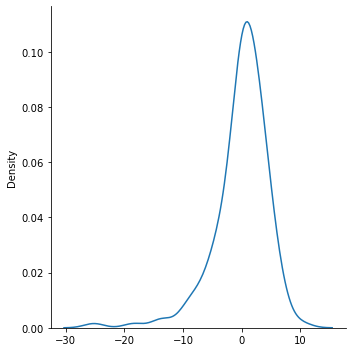

In [40]:
sns.displot(reg_pred-y_test,kind='kde')

In [41]:
from sklearn.metrics import r2_score
score=r2_score(reg_pred,y_test)
score

0.6693702691495609

In [42]:
df.columns

AttributeError: columns

In [47]:
df=pd.read_csv('placement.csv')

In [48]:
df

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1
...,...,...,...
95,6.33,6.38,0
96,8.23,7.76,1
97,6.65,7.78,0
98,8.14,5.63,1


In [49]:
df.columns

Index(['cgpa', 'resume_score', 'placed'], dtype='object')

In [50]:
X=df
y=df.placed

In [51]:
y

0     1
1     0
2     1
3     1
4     1
     ..
95    0
96    1
97    0
98    1
99    0
Name: placed, Length: 100, dtype: int64

In [52]:
stX_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_ate=42)


In [53]:
X_train

,cgpa,resume_score,placed
55,6.94,6.87,1
88,8.07,6.07,1
26,6.27,6.47,0
42,6.90,6.91,1
69,8.06,9.06,1
...,...,...,...
60,5.87,6.64,0
71,7.34,8.22,1
14,7.51,6.25,1
92,5.43,6.18,0


In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [55]:
X_train=scaler.fit_transform(X_train)

In [56]:
X_train

array([[-0.00860198, -0.12892612,  1.        ],
       [ 1.00129271, -0.92538093,  1.        ],
       [-0.60738909, -0.52715352, -1.        ],
       [-0.04435046, -0.08910338,  1.        ],
       [ 0.99235559,  2.05136891,  1.        ],
       [ 1.72519952, -1.06476052,  1.        ],
       [ 1.16216089, -1.67205731,  1.        ],
       [ 1.14428664,  0.75712985,  1.        ],
       [ 0.6616821 ,  0.11996601,  1.        ],
       [ 0.60805938,  0.97615492,  1.        ],
       [-1.34917015, -0.45746373, -1.        ],
       [ 0.08970635,  1.13544588,  1.        ],
       [-0.20521864, -1.53267772, -1.        ],
       [ 0.45612832,  0.66752868,  1.        ],
       [ 2.10949572,  0.3887695 ,  1.        ],
       [ 1.62689118, -0.80591271,  1.        ],
       [ 1.2515321 ,  1.01597766,  1.        ],
       [-0.81294288,  1.74274267, -1.        ],
       [ 1.00129271,  0.47837067,  1.        ],
       [ 0.97448134,  0.63766163,  1.        ],
       [-1.3312959 , -0.26830571, -1.   

In [57]:
X_test=scaler.fit_transform(X_test)

In [58]:
X_test

array([[ 0.62988394,  1.81146122,  1.        ],
       [-0.83602778,  0.64236664, -1.        ],
       [ 0.19011043,  0.96005539,  1.        ],
       [ 1.08798135, -1.54333192,  1.        ],
       [-1.32161103, -0.93336953, -1.        ],
       [ 0.53826446, -0.59026569,  1.        ],
       [-0.68943661, -1.12398278, -1.        ],
       [ 0.84060875,  1.32857433,  1.        ],
       [-0.67111271, -0.38694489, -1.        ],
       [ 1.12462915, -0.17091654,  1.        ],
       [-0.89099947, -0.98419973, -1.        ],
       [ 0.40999718,  0.62965909,  1.        ],
       [-1.05591454, -0.22174674, -1.        ],
       [ 1.39032565,  1.36669698,  1.        ],
       [-0.973457  , -1.39084133, -1.        ],
       [ 0.55658836,  0.82027234,  1.        ],
       [ 2.27903463, -1.46708662,  1.        ],
       [-0.94597116,  0.33738545, -1.        ],
       [-0.75357024,  0.4517534 , -1.        ],
       [-0.90932336,  0.46446095, -1.        ]])

In [59]:
regression= LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [62]:
mse

array([-4.83408416e-31, -1.84889275e-32, -3.17778441e-32, -1.62687154e-29,
       -4.23704588e-33])

In [63]:
np.mean(mse)

-3.361325531939043e-30

In [64]:
reg_pred=regression.predict(X_test)

In [65]:
reg_pred

array([ 1.00000000e+00,  5.55111512e-17,  1.00000000e+00,  1.00000000e+00,
       -1.11022302e-16,  1.00000000e+00, -1.11022302e-16,  1.00000000e+00,
        0.00000000e+00,  1.00000000e+00, -1.11022302e-16,  1.00000000e+00,
        0.00000000e+00,  1.00000000e+00, -1.11022302e-16,  1.00000000e+00,
        1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

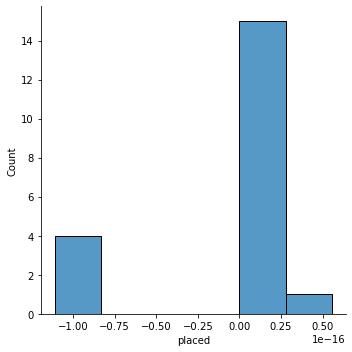

In [66]:
import seaborn as sns
sns.displot(reg_pred-y_test)

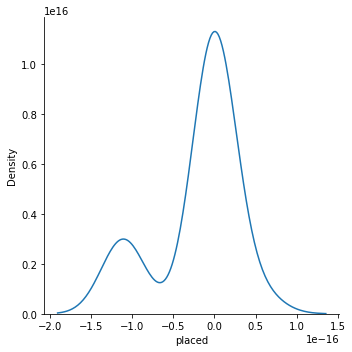

In [67]:
sns.displot(reg_pred-y_test,kind='kde')

# maltipal linear regrassion

In [1]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 
#allows you to interact with your plots directly in the notebook or shell output,such as zooming, panning, and saving

In [3]:
df_toy=pd.read_csv("covid_toy.csv")

In [4]:
df_toy

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No
...,...,...,...,...,...,...
95,12,Female,104.0,Mild,Bangalore,No
96,51,Female,101.0,Strong,Kolkata,Yes
97,20,Female,101.0,Mild,Bangalore,No
98,5,Female,98.0,Strong,Mumbai,No


In [5]:
df_toy.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


D:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


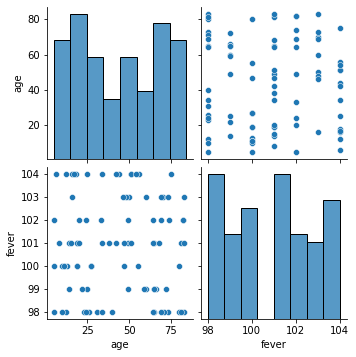

In [8]:
import seaborn as sns
sns.pairplot(df_toy)

In [11]:
X=df_toy.iloc[:,:-1]
y=df_toy.iloc[:,-1]


In [12]:
X

,age,gender,fever,cough,city
0,60,Male,103.0,Mild,Kolkata
1,27,Male,100.0,Mild,Delhi
2,42,Male,101.0,Mild,Delhi
3,31,Female,98.0,Mild,Kolkata
4,65,Female,101.0,Mild,Mumbai
...,...,...,...,...,...
95,12,Female,104.0,Mild,Bangalore
96,51,Female,101.0,Strong,Kolkata
97,20,Female,101.0,Mild,Bangalore
98,5,Female,98.0,Strong,Mumbai


In [13]:
y

0      No
1     Yes
2      No
3      No
4      No
     ... 
95     No
96    Yes
97     No
98     No
99    Yes
Name: has_covid, Length: 100, dtype: object

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [17]:
import seaborn as sns

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='fever'>

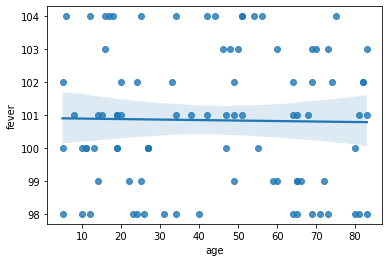

In [18]:
sns.regplot(df_toy["age"],df_toy["fever"])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fever', ylabel='age'>

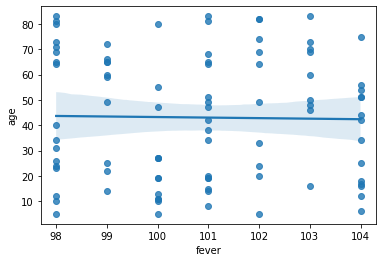

In [28]:
sns.regplot(df_toy["fever"],df_toy["age"])

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

ValueError: could not convert string to float: 'Female'

In [35]:
df_toy.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [47]:
categorical_features=["gender","cough","city","has_covid"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,
                               categorical_features)],
                             remainder="passthrough")
transformed_X= transformer.fit_transform(df_toy)

In [48]:
transformed_X

array([[  0.,   1.,   1., ...,   0.,  60., 103.],
       [  0.,   1.,   1., ...,   1.,  27., 100.],
       [  0.,   1.,   1., ...,   0.,  42., 101.],
       ...,
       [  1.,   0.,   1., ...,   0.,  20., 101.],
       [  1.,   0.,   0., ...,   0.,   5.,  98.],
       [  1.,   0.,   0., ...,   1.,  10.,  98.]])

In [51]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,60.0,103.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,27.0,100.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,42.0,101.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,31.0,98.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,65.0,101.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,12.0,104.0
96,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,51.0,101.0
97,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,20.0,101.0
98,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,98.0


In [49]:
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2,random_state=42)


NameError: name 'model' is not defined

In [50]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [52]:
X_train

array([[ 0.83793058, -0.83793058,  0.81649658, -0.81649658, -0.71374643,
        -0.5       , -0.6352234 ,  2.17124059, -1.05131497,  1.05131497,
         1.56614097,  0.        ],
       [ 0.83793058, -0.83793058,  0.81649658, -0.81649658, -0.71374643,
        -0.5       ,  1.5742493 , -0.46056619,  0.95118973, -0.95118973,
        -1.55894504, -0.49142303],
       [ 0.83793058, -0.83793058,  0.81649658, -0.81649658, -0.71374643,
        -0.5       ,  1.5742493 , -0.46056619, -1.05131497,  1.05131497,
        -0.98327131, -0.49142303],
       [-1.19341628,  1.19341628,  0.81649658, -0.81649658, -0.71374643,
         2.        , -0.6352234 , -0.46056619, -1.05131497,  1.05131497,
        -0.65431488, -0.49142303],
       [ 0.83793058, -0.83793058,  0.81649658, -0.81649658, -0.71374643,
         2.        , -0.6352234 , -0.46056619,  0.95118973, -0.95118973,
         1.23718454,  0.98284607],
       [-1.19341628,  1.19341628, -1.22474487,  1.22474487, -0.71374643,
        -0.5       ,  

In [53]:
y_train

55    Yes
88     No
26    Yes
42    Yes
69     No
     ... 
60    Yes
71     No
14     No
92     No
51    Yes
Name: has_covid, Length: 80, dtype: object